### MACHINE LEARNING PROJECT I

#### TEAM MEMBERS: ASLI YORUSUN - ERDEM BOCUGOZ - SERIF SONER SERBEST

In [31]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from helpers import *
from implementations import *
from data import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing Raw Data

In [2]:
prediction,data,id_ = load_csv_data("train.csv", sub_sample=False)

In [3]:
data.shape

(250000, 30)

### Data Processing

In [4]:
pred_0, pred_1, pred_2, data_0, data_1, data_2, indices_0, indices_1, indices_2 = categorizeData(prediction, data)

data_0 = clean_data(data_0)
data_1 = clean_data(data_1)
data_2 = clean_data(data_2)


In [5]:
x, mean_x, std_x = standardize(data)
y, tx = build_model_data(prediction, x)

x0, mean_x0, std_x0 = standardize(data_0)
y0, tx0 = build_model_data(pred_0,x0)

x1, mean_x1, std_x1 = standardize(data_1)
y1, tx1 = build_model_data(pred_1,x1)

x2, mean_x2, std_x2 = standardize(data_2)
y2, tx2 = build_model_data(pred_2,x2)

### Gradient Descent

In [51]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=6.419 seconds
Gradient Descent: RMSE Loss =0.41232720675632334


### Stochastic Gradient Descent

In [52]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.1

# Initialization
initial_w = np.zeros(tx.shape[1])

weights, loss = least_squares_GD(y, tx, initial_w, max_iters, gamma)

Gradient Descent: execution time=6.538 seconds
Gradient Descent: RMSE Loss =0.41232720675632334


### Least Squares

In [53]:
weights, loss = least_squares(y, tx)

Least Squares: execution time=0.044 seconds
Least Squares: RMSE Loss =0.4119742701245614


### Ridge Regression

Selecting Hyperparameter By Splitting the Data...
Hyperparameter Selection: Lambda =0.005689866029018305
Ridge Regression: RMSE Loss =0.41250633053033664


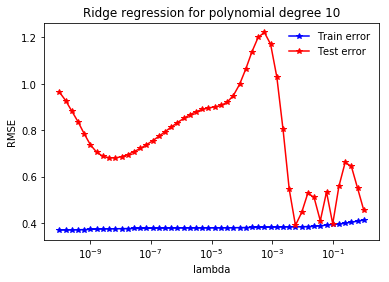

In [54]:
seed = 1
degree = 10
split_ratio = 0.9
lambdas = np.logspace(-10, 0, 50)

lambda_ = select_hyperparameter_for_ridge_regression(x, y, degree, split_ratio, seed, lambdas)



### Cross Validation

In [ ]:
seed = 32
degree = 10
k_fold = 4
step = 10
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_ = select_hyperparameter_with_cross_validation(y, x, seed, degree, k_fold, step, lambdas)
weights, loss = ridge_regression(y, tx, lambda_)

#### Cross Validation for Subsets

Selecting Hyperparameter By Using 4-fold Cross Validation...
Hyperparameter Selection: Lambda =1.0
Ridge Regression: RMSE Loss =0.4300685993070841


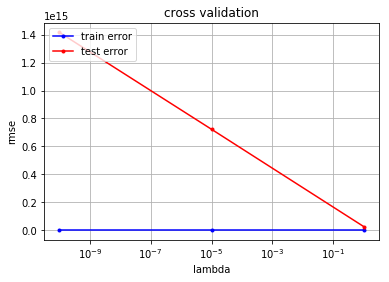

In [11]:
seed = 32
degree = 10
k_fold = 4
step = 3
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_0 = select_hyperparameter_with_cross_validation(y0, x0, seed, degree, k_fold, step, lambdas)
w0, loss0 = ridge_regression(y0, tx0, lambda_0)

Selecting Hyperparameter By Using 4-fold Cross Validation...
Hyperparameter Selection: Lambda =1e-05
Ridge Regression: RMSE Loss =0.43165119876358343


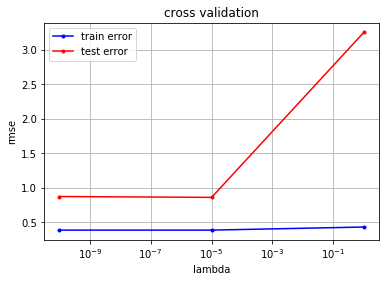

In [12]:
seed = 32
degree = 10
k_fold = 4
step = 3
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_1 = select_hyperparameter_with_cross_validation(y1, x1, seed, degree, k_fold, step, lambdas)
w1, loss1 = ridge_regression(y1, tx1, lambda_1)

Selecting Hyperparameter By Using 4-fold Cross Validation...
Hyperparameter Selection: Lambda =1e-05
Ridge Regression: RMSE Loss =0.43165119876358343


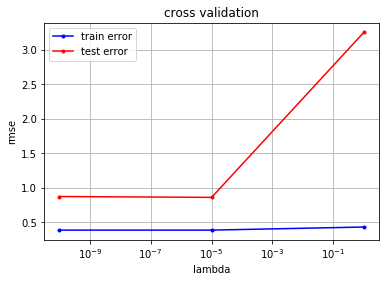

In [13]:
seed = 32
degree = 10
k_fold = 4
step = 3
lambdas = np.logspace(-10, 0, step)

# Cross Validation for Ridge Regression
lambda_1 = select_hyperparameter_with_cross_validation(y1, x1, seed, degree, k_fold, step, lambdas)
w1, loss1 = ridge_regression(y1, tx1, lambda_1)

### Logistic Regression

In [18]:
# init parameters
max_iter = 100
gamma = 0.1

weights, loss = logistic_regression(y, tx, max_iter, gamma)

Regularized Logistic Regression: Loss=0.5313728708781967


#### Logistic Regression for Subsets

In [27]:
# init parameters
max_iter = 100
gamma = 0.1

w0, loss0 = logistic_regression(y0, tx0, max_iter, gamma)

Regularized Logistic Regression: Loss=0.44066914613292857


In [28]:
w1, loss1 = logistic_regression(y1, tx1, max_iter, gamma)

Regularized Logistic Regression: Loss=0.5609221985433164


In [29]:
w2, loss2 = logistic_regression(y2, tx2, max_iter, gamma)

Regularized Logistic Regression: Loss=0.546732751304863


#### Testing Logistic Regression Results

In [30]:
### Test Log Reg

y_pred0 = predict_labels(w0,tx0)
y_pred1 = predict_labels(w1,tx1)
y_pred2 = predict_labels(w2,tx2)

rows = prediction.shape[0]
labels = decategorizePrediction(rows, y_pred0, y_pred1, y_pred2, indices_0, indices_1, indices_2)

labels = np.where(labels == -1, 0, labels)

score = np.invert(np.logical_xor(prediction, np.squeeze(labels)))
score.mean()

0.7325

### Regularized Logistic Regression

In [57]:
# Define the parameters of the algorithm.
max_iter = 100
gamma = 0.1

weights, loss = reg_logistic_regression(y, tx, lambda_, max_iter, gamma)

Regularized Logistic Regression: Loss=0.533355983057027


#### Regularized Logistic Regression for Subsets

In [ ]:
# Define the parameters of the algorithm.
max_iter = 100
gamma = 0.1

w0, loss0 = reg_logistic_regression_gradient_descent_demo(y0, tx0, lambda_, max_iter, threshold, gamma)

In [ ]:
w1, loss1 = reg_logistic_regression_gradient_descent_demo(y1, tx1, lambda_, max_iter, threshold, gamma)

In [ ]:
w2, loss2 = reg_logistic_regression_gradient_descent_demo(y2, tx2, lambda_, max_iter, threshold, gamma)

### Submission of Results

In [116]:
test_label,test_data,test_id_ = load_csv_data("test.csv", sub_sample=False)

# Split the data
pred_0_test, pred_1_test, pred_2_test, pred_3_test, data_0_test, data_1_test, data_2_test, data_3_test, indices_0_test, indices_1_test, indices_2_test, indices_3_test = categorizeData(test_label, test_data)

# Clean the data
data_0_test = clean_data(data_0_test)
data_1_test = clean_data(data_1_test)
data_2_test = clean_data(data_2_test)
data_3_test = clean_data(data_3_test)

# Standardize the data
x0_test, mean_x0_test, std_x0_test = standardize(data_0_test)
y0_test, tx0_test = build_model_data(pred_0_test,x0_test)

x1_test, mean_x1_test, std_x1_test = standardize(data_1_test)
y1_test, tx1_test = build_model_data(pred_1_test,x1_test)

x2_test, mean_x2_test, std_x2_test = standardize(data_2_test)
y2_test, tx2_test = build_model_data(pred_2_test,x2_test)

x3_test, mean_x3_test, std_x3_test = standardize(data_3_test)
y3_test, tx3_test = build_model_data(pred_3_test,x3_test)

# Label predictions
y_pred0 = predict_labels(w0,tx0_test)
y_pred1 = predict_labels(w1,tx1_test)
y_pred2 = predict_labels(w2,tx2_test)
y_pred3 = predict_labels(w3,tx3_test)

# Prepare for submission
rows = test_label.shape[0]
labels = decategorizePrediction(rows, y_pred0, y_pred1, y_pred2, y_pred3, indices_0_test, indices_1_test, indices_2_test, indices_3_test)

# Create submission file
create_csv_submission(test_id_,labels,"submission.csv")